# Business Problem

1. **Objective**
   - To classifiy an image into 3 categories: Driving License, Social Security Card, Other
   - Learn from images and its properties to classify into the respective categories better


2. **Machine Learning Problem**
   - Develop a machine learning model based on convolution neural network to learn properties of the 3 categories of images and predict accurately for new image


3. **Technology**
   - Python, Scikit-learn, tensorflow, keras, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t classification accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time to classify images



**Dataset**<br>
driving_license images<br>
social_security images<br>
other images<br>

In [1]:
!pip install numpy
!pip install keras
!pip install tensorflow
!pip install matplotlib

In [2]:
import numpy as np
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir = pathlib.Path('/content/drive/My Drive/blogs/input/Training_data/')

In [5]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

600


In [6]:
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

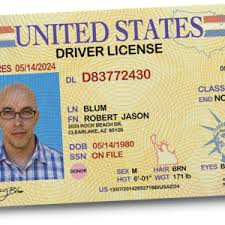

In [7]:
PIL.Image.open(str(driving_license[2]))

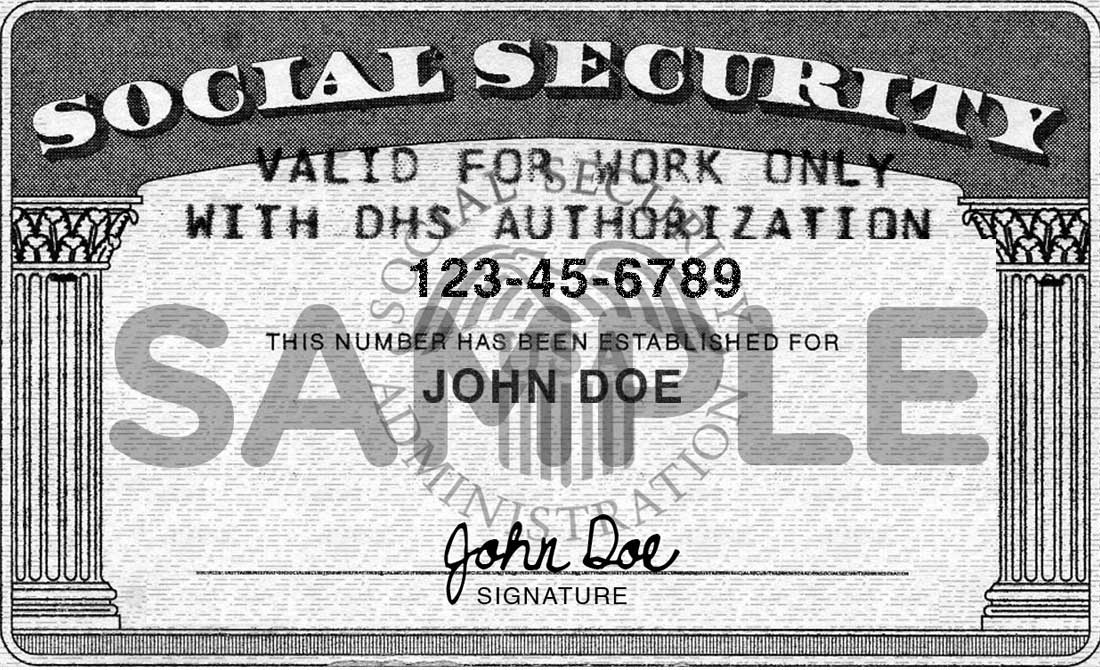

In [8]:
PIL.Image.open(str(social_security[10]))

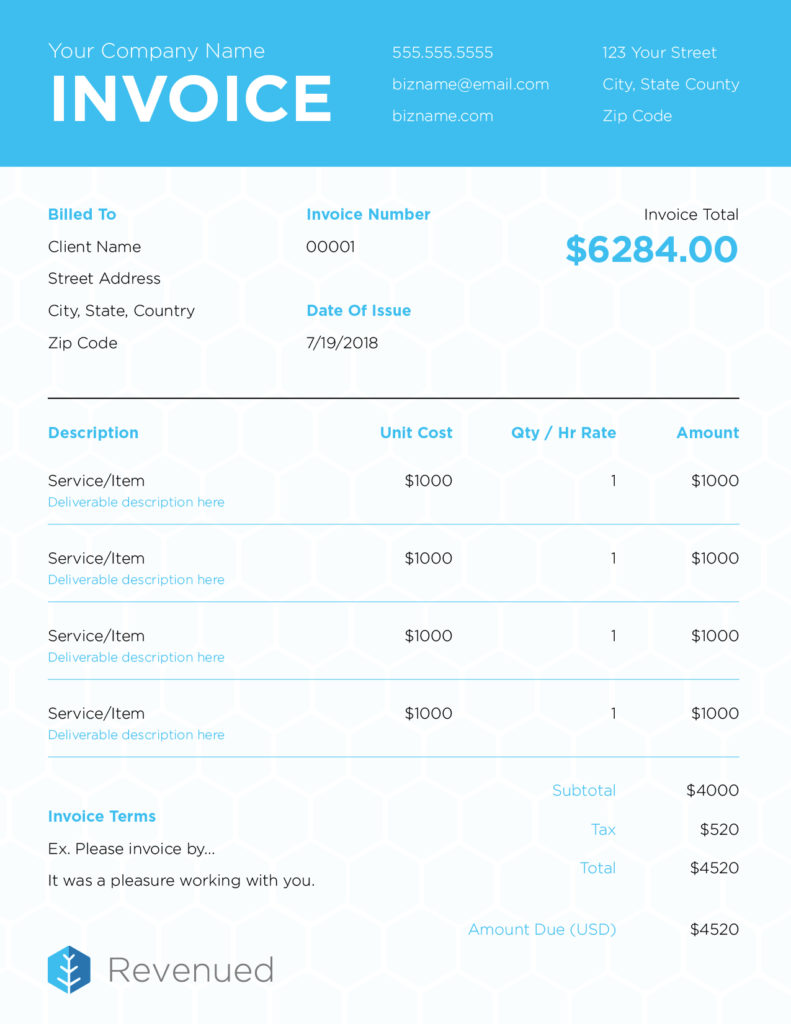

In [9]:
PIL.Image.open(str(others[140]))

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['driving_license', 'others', 'social_security']


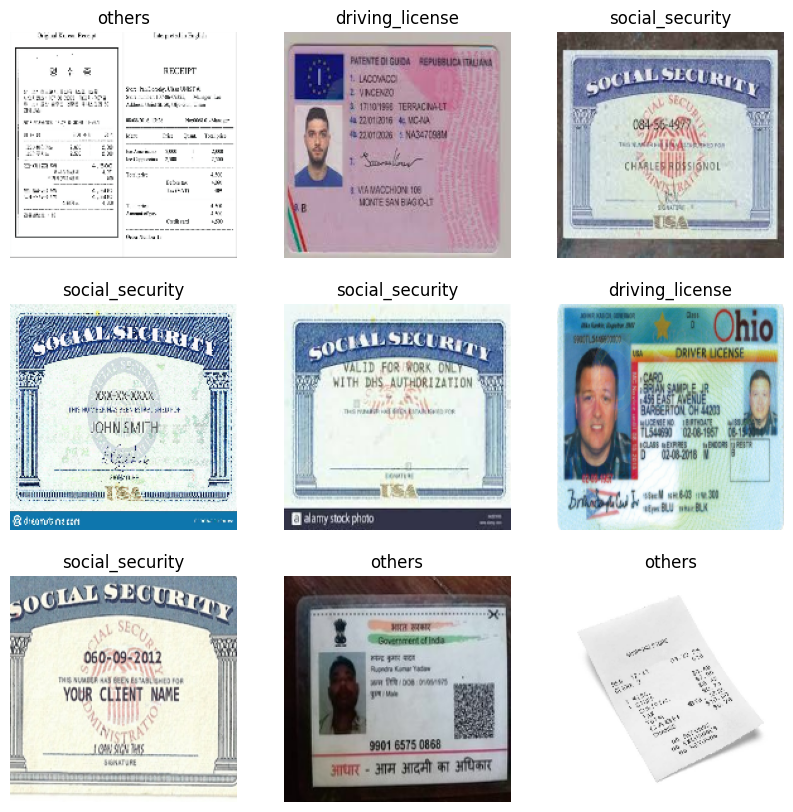

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0041666594 1.0


In [19]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4165 - loss: 2.1111 - val_accuracy: 0.3833 - val_loss: 1.0502
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6091 - loss: 0.9459 - val_accuracy: 0.8083 - val_loss: 0.5944
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8310 - loss: 0.5088 - val_accuracy: 0.7583 - val_loss: 0.6529
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8698 - loss: 0.3310 - val_accuracy: 0.8750 - val_loss: 0.3261
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9475 - loss: 0.1643 - val_accuracy: 0.8750 - val_loss: 0.3277
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9420 - loss: 0.1312 - val_accuracy: 0.8833 - val_loss: 0.3610
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9676 - loss: 0.0906 - val_accuracy: 0.9167 - val_loss: 0.3452
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9897 - loss: 0.0465 - val_accuracy: 0.9167 - val_loss:

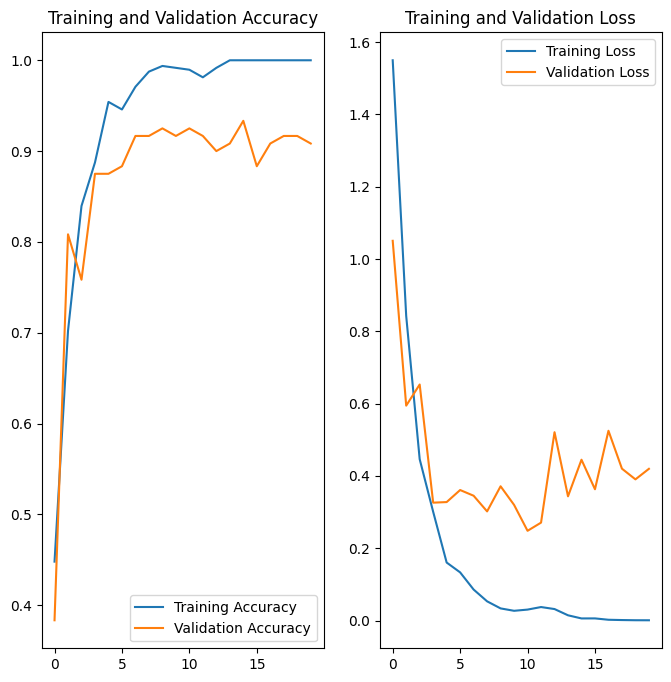

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

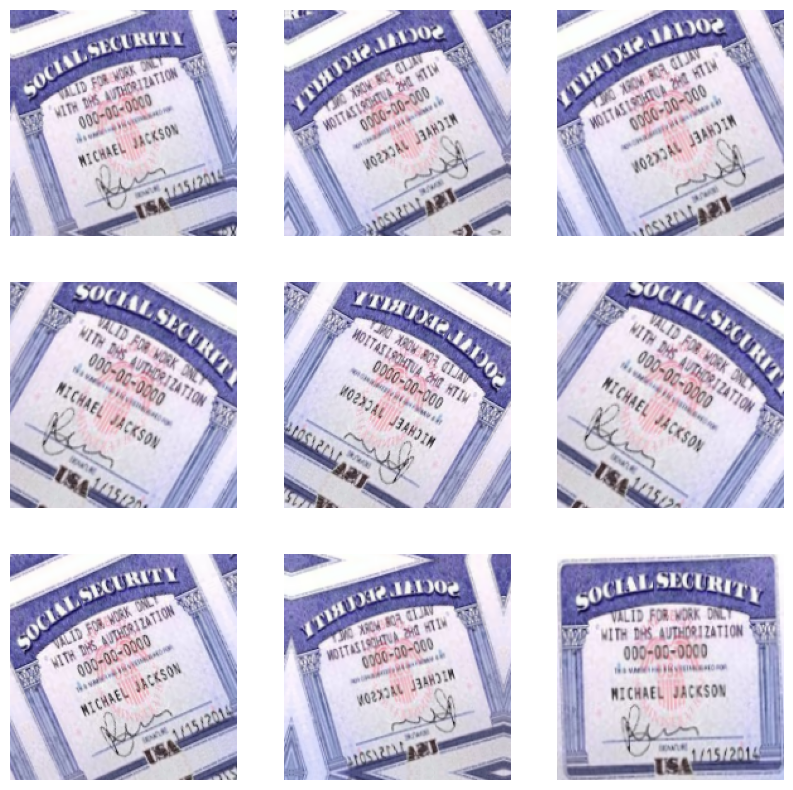

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2701 - loss: 2.3096 - val_accuracy: 0.3083 - val_loss: 1.0793
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4052 - loss: 1.0746 - val_accuracy: 0.3750 - val_loss: 1.0130
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6348 - loss: 0.8784 - val_accuracy: 0.5333 - val_loss: 1.0614
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6927 - loss: 0.6855 - val_accuracy: 0.7583 - val_loss: 0.6477
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7459 - loss: 0.6464 - val_accuracy: 0.7333 - val_loss: 0.6943
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8072 - loss: 0.4765 - val_accuracy: 0.7417 - val_loss: 0.7167
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8067 - loss: 0.4490 - val_accuracy: 0.8500 - val_loss: 0.3854
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8237 - loss: 0.4109 - val_accuracy: 0.9167 - val_loss:

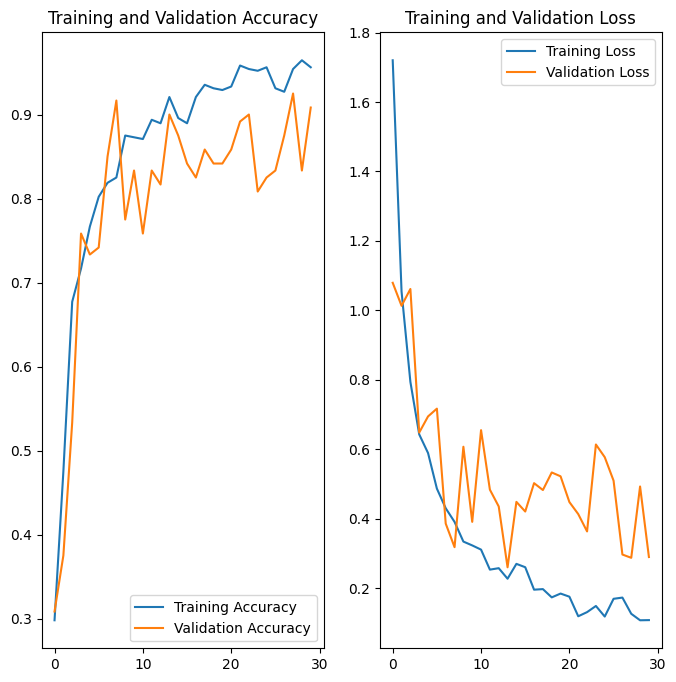

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Prediction

In [34]:
test_data_dir = pathlib.Path("/content/drive/My Drive/blogs/input/Testing_Data/")

In [35]:
image_count = len(list(test_data_dir.glob('*/*')))
print(image_count)

150


In [36]:
test_driving_license = list(test_data_dir.glob('driving_license/*'))
test_social_security = list(test_data_dir.glob('social_security/*'))
test_others = list(test_data_dir.glob('others/*'))

In [37]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 3 classes.


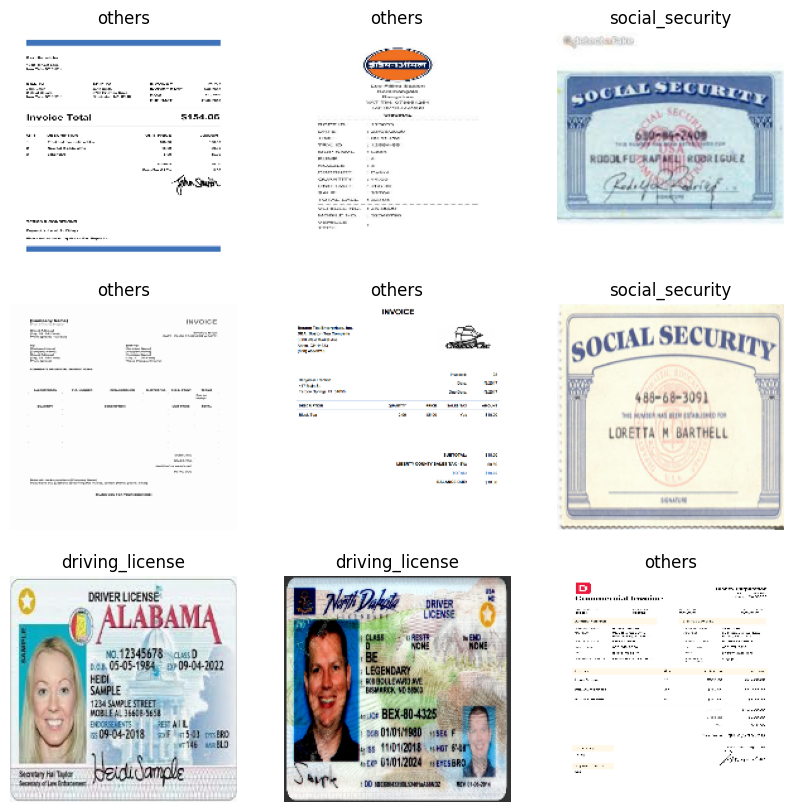

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [39]:
model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9037 - loss: 0.3015


[0.33409973978996277, 0.8999999761581421]

In [40]:
img = tf.keras.utils.load_img(
    "/content/drive/My Drive/blogs/input/Testing_Data/others/111.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [41]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
This image most likely belongs to others with a 99.85 percent confidence.
